
#### using ARIMA and Seasonal ARIMA


#### Autoregressive Integrated Moving Averages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")


In [2]:
df=pd.read_excel('Australia_quarterly_inflation_rate.xlsx')

In [3]:
df.head()

,Year,Quarterly_Inflation_Rate
0,2007-03-01,2.5
1,2007-06-01,2.1
2,2007-09-01,1.8
3,2007-12-01,2.9
4,2008-03-01,4.3


In [4]:
df.tail()

,Year,Quarterly_Inflation_Rate
47,2018-12-01,1.8
48,2019-03-01,1.3
49,2019-06-01,1.6
50,2019-09-01,1.7
51,2019-12-01,1.8


In [5]:
# Convert Year into Datetime
df['Year']=pd.to_datetime(df['Year'])

In [6]:
df.head()

,Year,Quarterly_Inflation_Rate
0,2007-03-01,2.5
1,2007-06-01,2.1
2,2007-09-01,1.8
3,2007-12-01,2.9
4,2008-03-01,4.3


In [7]:
df.set_index('Year',inplace=True)

In [8]:
df.head()

,Quarterly_Inflation_Rate
Year,
2007-03-01,2.5
2007-06-01,2.1
2007-09-01,1.8
2007-12-01,2.9
2008-03-01,4.3


In [9]:
df.describe()

,Quarterly_Inflation_Rate
count,52.000000
mean,2.275000
std,0.881815
min,1.000000
25%,1.675000
50%,2.100000
75%,2.900000
max,5.000000


In [10]:
sm.stats.durbin_watson(df)

array([0.05113508])

## Step 2: Visualize the Data

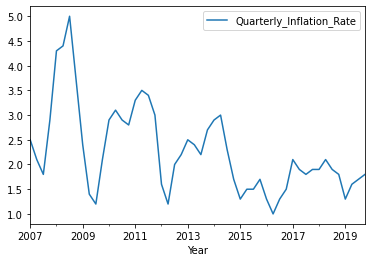

In [11]:
df.plot()

In [12]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(df['Quarterly_Inflation_Rate'])

In [14]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Quarterly_Inflation_Rate):
    result=adfuller(Quarterly_Inflation_Rate)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [15]:
adfuller_test(df['Quarterly_Inflation_Rate'])

ADF Test Statistic : -1.256424751951442
p-value : 0.6488649535421371
#Lags Used : 8
Number of Observations Used : 43
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [16]:
df['Inflation rate First Difference'] = df['Quarterly_Inflation_Rate'] - df['Quarterly_Inflation_Rate'].shift(1)

In [17]:
df['Quarterly_Inflation_Rate'].shift(1).head()

Year
2007-03-01    NaN
2007-06-01    2.5
2007-09-01    2.1
2007-12-01    1.8
2008-03-01    2.9
Name: Quarterly_Inflation_Rate, dtype: float64

In [18]:
df['Seasonal First Difference']=df['Quarterly_Inflation_Rate']-df['Quarterly_Inflation_Rate'].shift(4)

In [19]:
df.head(10)

,Quarterly_Inflation_Rate,Inflation rate First Difference,Seasonal First Difference
Year,,,
2007-03-01,2.5,NaN,NaN
2007-06-01,2.1,-0.4,NaN
2007-09-01,1.8,-0.3,NaN
2007-12-01,2.9,1.1,NaN
2008-03-01,4.3,1.4,1.8
2008-06-01,4.4,0.1,2.3
2008-09-01,5.0,0.6,3.2
2008-12-01,3.7,-1.3,0.8
2009-03-01,2.4,-1.3,-1.9


In [20]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.2712690751492977
p-value : 0.18140173362755974
#Lags Used : 8
Number of Observations Used : 39
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


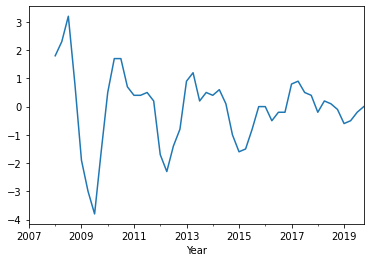

In [21]:
df['Seasonal First Difference'].plot()

In [22]:
## Again test dickey fuller test
adfuller_test(df['Inflation rate First Difference'].dropna())

ADF Test Statistic : -5.220683461319861
p-value : 7.976284218486046e-06
#Lags Used : 8
Number of Observations Used : 42
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


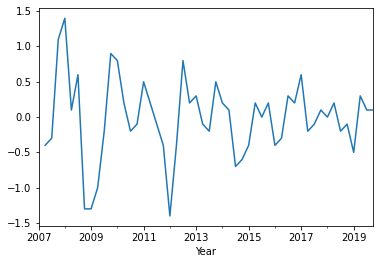

In [23]:
df['Inflation rate First Difference'].plot()

## Auto Regressive Model

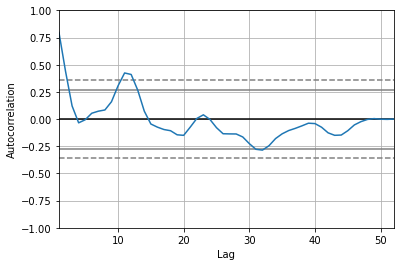

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Quarterly_Inflation_Rate'])
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

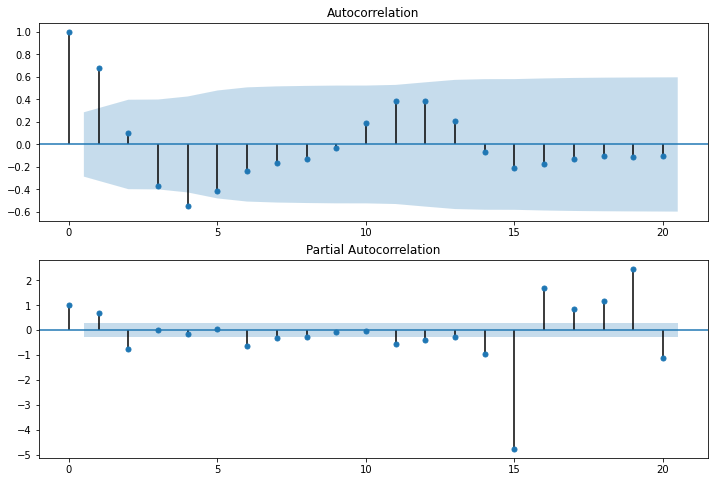

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[5:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[5:],lags=20,ax=ax2)

In [27]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [28]:
model=ARIMA(df['Quarterly_Inflation_Rate'],order=(1,1,0))
model_fit=model.fit()

In [29]:
model_fit.aic

82.53103931280765

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D.Quarterly_Inflation_Rate   No. Observations:                   51
Model:                         ARIMA(1, 1, 0)   Log Likelihood                 -38.266
Method:                               css-mle   S.D. of innovations              0.512
Date:                        Thu, 21 Jan 2021   AIC                             82.531
Time:                                10:38:01   BIC                             88.327
Sample:                            06-01-2007   HQIC                            84.746
                                 - 12-01-2019                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0170      0.115     -0.147      0.883      -0.243       0.209
ar.L1.D.Quarterly_Inflation_Rate     0.3871      0.128      3.030      0.002       0.137       0.638
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5834           +0.0000j            2.5834            0.0000
-----------------------------------------------------------------------------
"""

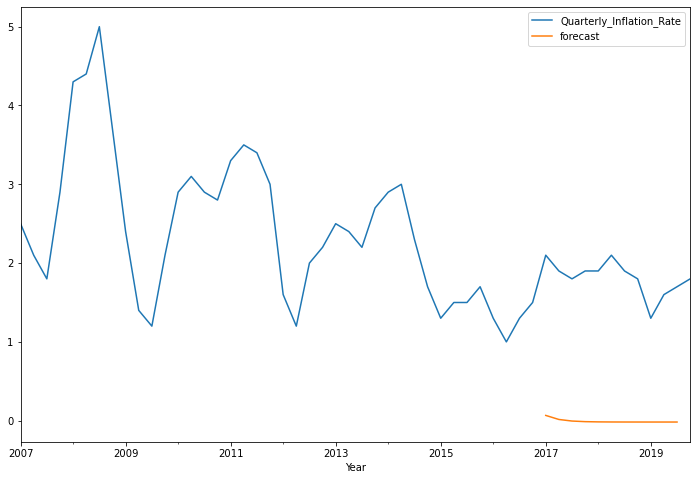

In [31]:
df['forecast']=model_fit.predict(start=40,end=50,dynamic=True)
df[['Quarterly_Inflation_Rate','forecast']].plot(figsize=(12,8))

In [32]:
model=sm.tsa.statespace.SARIMAX(df['Quarterly_Inflation_Rate'],order=(1,1, 0),seasonal_order=(1,1,0,4))
results=model.fit()

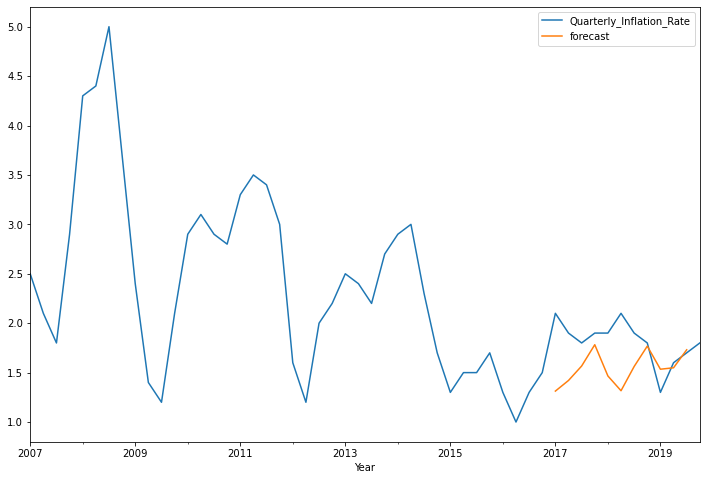

In [33]:
df['forecast']=results.predict(start=40,end=50,dynamic=True)
df[['Quarterly_Inflation_Rate','forecast']].plot(figsize=(12,8))

In [34]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,36,3)]

In [35]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [36]:
future_datest_df.tail()

,Quarterly_Inflation_Rate,Inflation rate First Difference,Seasonal First Difference,forecast
2021-09-01,NaN,NaN,NaN,NaN
2021-12-01,NaN,NaN,NaN,NaN
2022-03-01,NaN,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN


In [37]:
future_df=pd.concat([df,future_datest_df])

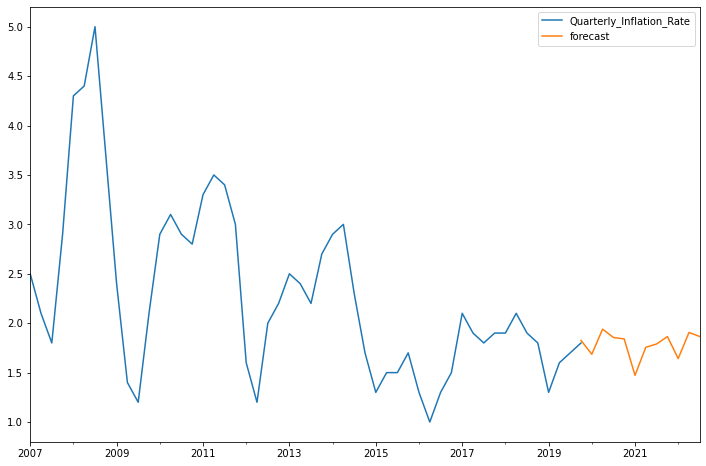

In [38]:
future_df['forecast'] = results.predict(start = 51, end = 65, dynamic= True)  
future_df[['Quarterly_Inflation_Rate', 'forecast']].plot(figsize=(12, 8)) 

In [39]:
future_df.tail(12)

,Quarterly_Inflation_Rate,Inflation rate First Difference,Seasonal First Difference,forecast
2019-12-01,1.8,0.1,0.0,1.826179
2020-03-01,NaN,NaN,NaN,1.686001
2020-06-01,NaN,NaN,NaN,1.939546
2020-09-01,NaN,NaN,NaN,1.855633
2020-12-01,NaN,NaN,NaN,1.840732
2021-03-01,NaN,NaN,NaN,1.472577
2021-06-01,NaN,NaN,NaN,1.756244
2021-09-01,NaN,NaN,NaN,1.789719
2021-12-01,NaN,NaN,NaN,1.864790
2022-03-01,NaN,NaN,NaN,1.641913
